# Your first genetic algorithm

Now that you understand the building block of a neural network, we will create one based on genetic evolution.<br>
You will first need to install the gym_snake from seanbae.<br><br>

<center><b><a href="https://github.com/nicomon24/Sneks" target="_blank">https://github.com/nicomon24/Sneks</a></b></center><br><br>
To install the library, run the following cell (this may take a few minutes)

In [1]:
!git clone https://github.com/nicomon24/Sneks
!pip install -e ./Sneks

Cloning into 'Sneks'...


Obtaining file:///D:/git/all-ml/Sneks
  Found existing installation: sneks 0.0.1
    Uninstalling sneks-0.0.1:
      Successfully uninstalled sneks-0.0.1
  Running setup.py develop for sneks


c:\users\alexandre\appdata\local\programs\python\python36\lib\site-packages\pip\_internal\req\req_install.py:391: UserWarning: Unbuilt egg for Unknown [unknown version] (c:\users\alexandre\appdata\local\programs\python\python36\lib\site-packages)
  self.satisfied_by = pkg_resources.get_distribution(str(no_marker))


If you are running on windows, execute this cell to complete the installation:

In [2]:
!move ./Sneks/sneks ./snek
!rd /s /q Sneks
!move ./snek ./sneks

        1 r‚pertoires d‚plac‚s.
        1 r‚pertoires d‚plac‚s.


Linux lovers, here is yours:

In [ ]:
!mv ./Sneks/sneks ./snek
!rm -rf gym-snake
!move ./snek ./sneks

# Basics of gym

Now that we have the environment ready to be used, we will focus on how this works.
Let's import the newly set environment.

In [3]:
import gym #Import gym library from OpenAI
import sneks

env = gym.make('babysnek-raw-16-v1') #Create the environment.

If the above cell did not execute correctly, please check you correctly have correctly have the sneks folder in the same directory of the notebook. It should be without any caps!

<center><img src="ipynb_images/install_snake.jpg"></img></center><br>

Ok. Now that your installation works and we created the environment, let's see how it works...

In [4]:
env.reset(); #This function is to call before each "game" your neural network will run.
#This will restart the game.
#The function returns a matrice of the observation state. I'll get back to this later.

In [5]:
env.render(); #This function is used to render a visual representation of what's going on in the game.
#You should see a window opening. If it freezes, it's normal. Don't panic!

Generally, the <i>env.render()</i> function is called when you want to see what your neural network does.<br>
However, you will see we will that most of the time we will not use this function.<br>
We want to train an agent and train it fast. Rendering is done at the same time the game is played, which reduces a lot the time performance!<br><br><br>
Now that we have started the environment we will play random actions to display how things work.<br>If you were in Mario, this action could be "move right, move left, jump...". Here, it is the movement of the snake we want to see.

In [6]:
env.action_space #Shows what is the structure of the expected input

Discrete(4)

The action_space is part of our environment. It describe here that we can give 4 different actions : 0, 1, 2 and 3.<br><br>
The environment is said <b><u>discrete</u></b> which means you can only select integer number.<br>
Discrete is opposed to <b><u>continuous</u></b>, which represents continuous variable.<br><br>
A discrete variable could be the face of a dice, it can only be 1, 2, 3, 4, 5 or 6.<br>But if you think of the weight of your dog, you would have something like 17,841Kg.<br>
Your dog don't come from 17Kg to 18Kg as a "jump". His weights <u>continuously</u> grows from 17 to 18. This is a continuous variable!

In [7]:
env.action_space.sample() #Calls a random possible movement of the snake, an integer between 0 and 4.

2

Now that we know what to send to the environment, we want our movement to be taken into consideration. For this, we will call the **env.step()** function.<br>
It returns the following information:<br>
- <u>Observation:</u> This is how the environment looks after your action. It allows you to track the movement of your snake. The observation is given when you execute a step and when you call *env.reset()*
- <u>reward:</u> The reward acquired in the last action. Did your snake eat the red dot ? If yes, this is a reward.
- <u>done:</u> Can you still play ? If your snake ate his tail or ran in the cliff... your game is finished. This is shown by a done set to True.
- <u>info:</u> Any additionnal information given by the environment.

In [8]:
env.step(env.action_space.sample())

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         101.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100., 100.,
         100.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
     

If you look at your opened window, you will see the black point did not move. It is because we need to call the env.render() to get an update.

In [9]:
env.reset();
print(env.step(env.action_space.sample()))
env.render();

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 101.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  

As you can see, the env.step() function returns a full matrice a observation.<br>
- 0 means you have nothing on the cell
- 255 is the food
- 101 is the head of the snake
- 100 is the tail of the snake<br><br>

In [10]:
#Generally, each 4 values are extracted as follow:
observation, reward, done, info = env.step(env.action_space.sample())

Now that we understand how Gym works we will start working on the neural network.

# The Neural network
## Data flow

When you enter in this new chapter, you should have already the basics of our building blocs from this <a href="https://github.com/alexandrelefourner/neural_networks_tutorial/blob/master/1.%20Neural%20Network%20principles%20exercices.ipynb" target="_blank">previous tutorial</a>. If not, I hardly recommend you to get a look at it.<br>
<br>
<br>
From what we saw with the gym environment, we need to select 1 out of 4 different numbers.
<br>This means our neural network will have 4 output neurons : One neuron for each decision.<br>

<center><img src="ipynb_images/neural_network_1.jpg"></img></center><br><br>

We feed the observation (each pixel) at the entrance of the neural network.<br>
Next, the information of the observation flows among the different layer of the neural network, up to the output layer.<br>
The neuron which lights at the end makes the decision to move the snake.<br><br>

## Genetic Algorithm Principles

Now that we understand how a decision wil be made to move the snake, we need to find out how to optimize this decision.<br>
For this, we will use a particular approach called _Genetic Algorithm_ which is based on evolution.<br>
The idea is to run an import number of simulations of similar networks. Once the simulation finished, we will check which network performed at best. Let's image 4 different networks:
- N1 got a score of -4
- N2 got a score of 31
- N3 got a score of 2
- N4 got a score of 10

We will take the best neural network (N2) and slightly modify it in multiple new versions (N2'1, N2'2, N2'3,...).<br><br>
This modification leads to a second generation of networks (N2').<br><br>
Being different, the networks may give different scores. We run new simulations and check the results:<br>
- N2'1 got a score of 32
- N2'2 got a score of 20
- N2'3 got a score of -2
- N2'4 got a score of 35


We take N2'4 to breed a new genertion and check again the results:<br>
- N2'4'1 got a score of 17
- N2'4'2 got a score of 60
- N2'4'3 got a score of 41
- N2'4'4 got a score of 28

N2'4'3 got the best result. We use it for next generation, etc...<br><br>
Progressively, we expect our networks to find the best structure to answer our problem.<br>
Let's create the first building block of our networks.

## Neural Network Skeleton & Forward pass

In [11]:
env.observation_space #We check the structure of the observation space.

Box(16, 16)

The input to give is a table of 16x16, as we saw previously.<br>
We will see in the future specific architecture which look at pixel and their surrouding, using <u>convolution</u>. For now however, we are not going to go that deep yet. Let's make it simple!<br>
We will consider each pixel separetely and flatten our representation :<br><br>


<center><img src="ipynb_images/flattening.jpg"></img></center><br><br>

In [12]:
import numpy as np #We will use numpy to speed up calculation.

Numpy is a python library based on C. This makes the calculations faster.<br>
If you plan to do neural networks or compure science, you should really master the <a href="" target="_blank">basics of numpy</a>.<br>

In [13]:
class NeuralNetwork():
    def __init__(self): #Called when the model is created.
        self._layers = [] #We create a list which will contain all our layers information
        self._outputs = np.ones(4) #We create the output neurons of our neural network.

    def forward(self, inputs):#Called when the model must make a prediction.
        inputs = inputs.reshape(-1) #We create a 16x16 table and flatten it.
                                     #each cell of this table will be a neuron.
        pass
    
    def mutate(self):#Called when the model is selected to breed a new generation.
        pass

We now have the skeleton of our neural network.<br>
To calculate the dataflow, we could simply multiply each neuron separately... but this would be very long. Numpy helps us to do it faster through matrix multiplications.<br>
Imagine you have a neural network of 2 layers : 5 input neurons, 2 output neurons.<br><br>
<center><img src="ipynb_images/neural_network_2.jpg"></img></center><br><br>
For each neuron of the second layer, you need to multiply each 5 neurons by their weights and sum them.
This makes 10 different multiplication and 10 more additions.<br>

No1 = Ni1\*$W_{1}^{1}$ + Ni2\*$W_{1}^{2}$ + Ni3\*$W_{1}^{3}$ + Ni4\*$W_{1}^{4}$ + Ni5\*$W_{1}^{5}$<br>
No2 = Ni1\*$W_{2}^{1}$ + Ni2\*$W_{2}^{2}$ + Ni3\*$W_{2}^{3}$ + Ni4\*$W_{2}^{4}$ + Ni5\*$W_{2}^{5}$<br>

Lucky for us, the multiplication can be done in parallel, which means through parallelization, we can be up to 10 times faster when computing each layer.<br>
<br>
We need for this to compute through matrix multiplications. The value of our input is stored in a matrice (here, a vector because we only have 1 dimension) and the weights in a second matrice.<br>
By multiplying both, we are able to get our neurons value.<br><br>
<center><img src="ipynb_images/matmul.jpg"></img></center><br><br>

In [14]:
input_layer = np.arange(5).reshape((5,1)) #We create the matrice NiX
input_layer

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [15]:
weights_layer = np.arange(10).reshape((2,5)) #We generate the weights
weights_layer

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [16]:
output_layer = np.matmul(weights_layer,input_layer) #We calculate the multiplication
output_layer

array([[30],
       [80]])

Our forward pass will use matrices multiplications. Therefore, we can edit our neural network to match this idea. 

In [17]:
def activate(layer): #the neuron equals 1 if the sum is superior equal to 1.
                    #Otherwise, it's 0.
    return np.where(layer >= 1, 1, 0)

class NeuralNetwork():
    def __init__(self):
        self._layers = []
        self._outputs = np.ones(4)

    def forward(self, inputs):
        inputs = inputs.reshape((-1,1)) #Please note that we reshape with (-1,1) to have it as a matrice.
                                        #Having at least 2 dimensions is required for numpy to calculate matmul.
        
        for layer in self._layers: #We iterate through each layer.
            #layer contain the weights of the layer.
            #if we multiply them by the inputs, we get the value of the second layer
            #(we will need to activate them, but let's get to this after!)
            
            inputs = np.matmul(layer,inputs) #inputs now contains the value of the layer.
                                            #This layer will be used as input for the next layer.
            inputs = activate(inputs) #We don't forget to active the value!
        
        #inputs now contains the value of the last layer.
        #We perform the matrix multiplication based on our self.output
        
        #With the actual code... it would not work, because our self._outputs is not a matrice.
        #but we will fix it in the next cells.
        
        output_layer = np.matmul(self._outputs, inputs) 
        
        return activate(output_layer)
    
    def mutate(self):
        pass

The code is getting closer and closer to what we want... however, we have a multiple problems yet:
- The code does not contain any layer and thus, it cannot work (but we will work on that later!)
- Since the network only fires 0 and 1... what to do if 2 neurons of the output layer fire ?

If the network says "go up" and "go down" at the same time, we could randomly take one... But this points another problem we did not touch yet : Continuous and discrete space.<br><br>
Up to now, we built the blocks by getting inspired with the biological system. The rule of the "all or none" : A neuron fires an electric impulse, or it does not.<br>
<br>
If we want to make a decision however, we are not always "100% sure" of something. We base our decisions on a part of uncertainety:<br>
- "I am not totally sure I can jump to this high"
- "I may be able to gain a few minute if I drive through this road"

All of this mean means "part of me think it might be possible, but another don't...". To base my decision, I inconsciently measure what part think it might succeed and what part think it might fail. Sometimes, we are even unable to make a choice : we know we don't have enough information to make a rational decision.<br>
This is this idea of uncertainety that we will develop in the next part.

## Continuous Activation function

Remember when we discussed about the threshold ?... Well, here comes our problem. if we plot our current activation functon, we will get something like this :

In [18]:
import matplotlib.pyplot as plt

space = np.arange(-3, 3, 0.02)
activated = np.where(space >=1, 1, 0)
plt.plot(space,space, color = "blue");
plt.plot(space,activated, color = "orange");
plt.title("Neuron value in blue, once activate in orange (all or none)")
plt.axvline(0, color="red", alpha = 0.2);
plt.axhline(0, color="red", alpha = 0.2);

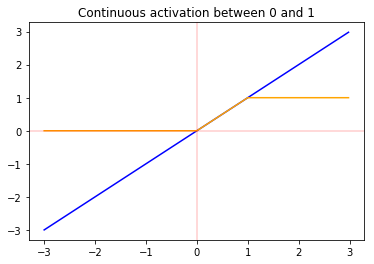

In [19]:
activated = np.where(space >=1, 1, np.where(space <0, 0, space))
plt.plot(space,space, color = "blue");
plt.plot(space,activated, color = "orange");
plt.title("Continuous activation between 0 and 1")
plt.axvline(0, color="red", alpha = 0.2);
plt.axhline(0, color="red", alpha = 0.2);

This activation function is better than the previous, because we now have a continuous activation.<br>
They are a vast number of activation, that you can find below. We will detail them more and see why they are so important in the next chapters.

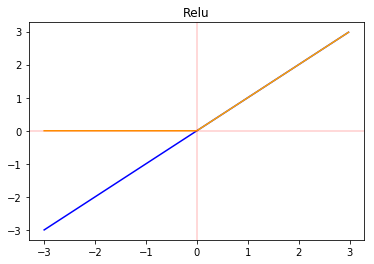

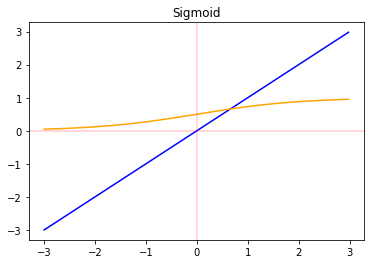

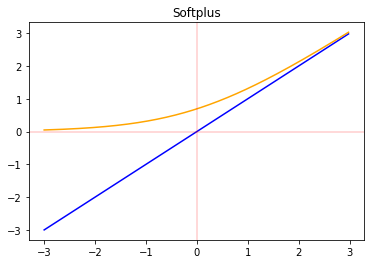

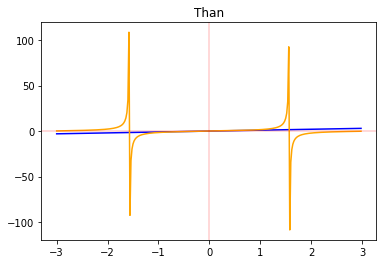

In [20]:
from lexml import lexmlcourses
lexmlcourses.display_activations_functions();

Our activation function tried to contrain the flow between 0 and 1. However, it does not give possibility to have values in between.<br>
Instead, we may use something which takes all values between 0 and 1, but reduce all values more than 1 to 1 and everything negative to 0.<br>
During this project, we will use sigmoid at the end of each layer. The idea behind is to keep some information from each gate, even if it is not that much.<br>
<br>
But what about our final layer ?... Even if the probability to get the same value for 2 neurons is inferior with sigmoid than it was with the All-or-None gate; we may prefere specific activation function, like <a href="https://en.wikipedia.org/wiki/Softmax_function">Softmax</a>.<br><br>

<center><img src="ipynb_images/softmaxfunction.jpg"></img></center><br><br>

If you did not do too much calculus in school Softmax may seem a bit complicated at first, but don't worry, it is not.<br>
If you have to remember one thing : If I activate all neurons of a layer with softmax, the sum of their activation will be 1.<br>
In genetic algorithm, we may not find a huge difference in performance compared to sigmoid.<br>
In the next chapter however, you will see more its efficiency.<br>

In [21]:
def sigmoid_activate(layer): #Sigmoid function
    return 1/(1+np.exp(-layer))


def softmax_activate(layer): #Softmax function
    m = np.exp(layer)
    return m/m.sum(len(layer.shape)-1)

In [22]:
class NeuralNetwork():
    def __init__(self):
        self._layers = []
        self._outputs = np.ones(4)

    def forward(self, inputs):
        inputs = inputs.reshape((-1,1))
        
        for layer in self._layers:
            inputs = np.matmul(layer,inputs)
            inputs = sigmoid_activate(inputs) #Updated to sigmoid
        
        output_layer = np.matmul(self._outputs, inputs)
            #Does not take into account the different size of the matrix.
            #We will fix it soon!
        
        return softmax_activate(output_layer)#Updated to softmax
        

    def mutate(self):
        pass

## Finishing the forward pass
Up to now, we created a skeleton which can forward the data through different layers.<br>
We will now prepare the intialization of our neural networks.<br>
For this, we will initialize a certain number of layers with a certain size, but also adding the biases.<br>

In [25]:
nb_layers = 3 #We set up 3 hidden layers.
neurons = 25 #Neurons per layers

In [31]:
class NeuralNetwork():
    def __init__(self, observation_size): #We specify the observation
        self._layers = []
        self._biases = [] #we implement the biases
        
        for i in range(nb_layers):
            entry_size = neurons if i != 0 else observation_size #First layer must match the input layer.
                                                                #Remember : The input layer is all the map, flattened.
            
            #our weights values will be from -1 to 1.
            self._layers.append(np.random.rand(neurons,entry_size)*2-1) #we initialize random values
            self._biases.append(np.random.rand(neurons, 1)*2-1) #we initialize random values.
        

        self._outputs = np.random.rand(4,neurons)*2-1 #Output layer must contain a total of 4 cells.
        #We don't add it into self._layers because we want to activate it with a softmax.


    def forward(self, inputs):
        inputs = inputs.reshape((-1,1))
        

        for layer, bias in zip(self._layers, self._biases): #we zip the biases to the layer
            inputs = np.matmul(layer,inputs)
            inputs = inputs+bias
            inputs = sigmoid_activate(inputs)
            
        inputs = np.matmul(self._outputs, inputs) #(4,1)
        inputs = inputs.reshape(-1) #Just a vector of 4 elements.
        
        
        return softmax_activate(inputs)#Updated to softmax

    def mutate(self):
        pass

In [32]:
#Let's test our forward pass
obs_size = env.observation_space.shape[0] * env.observation_space.shape[1]
Sample = NeuralNetwork(obs_size) #Creating a new agen.

#random observation
obs = np.random.rand(obs_size)

choice = Sample.forward(obs)
print("list of decision:",choice)
print("Decision taken:",choice.argmax())

list of decision: [0.00714822 0.05383172 0.05771648 0.88130358]
Decision taken: 3


We successly implemented the forward pass!
Our agent is now able to take a decision based on the input we provide.

## First simulation

Now that our agent can take a decision, we will generate an environment for it to run.

In [33]:
import time #used to wait between each frame.

observation = env.reset()#We get the first element of the game.
env.render() #We render it.

done = False #While not True, the simulation runs.

while(not done):
    observation, reward, done, info = env.step(Sample.forward(observation).argmax()) #We exectue an action.
    env.render() #We tell gym we want to render.
    time.sleep(0.1) #Used for rendering.

Well... The snake moves but rush toward the cliff. Our Artificial Intelligence does not show too much intelligence... and it's normal. Its behavior is totally made through randomness.<br>



# Genetic Algorithm

## Creating candidates
Now that we now how to run the algorithm, we can create a group of snake candidates and launch them into a feeding race. However, we want to track the evolution of the rewards, so we add it to the Snake object

In [34]:
class NeuralNetwork():
    def __init__(self, observation_size):
        self._rewards = 0 #Number of registered rewards.
        self._layers = []
        self._biases = []
        
        for i in range(nb_layers):
            entry_size = neurons if i != 0 else observation_size
            self._layers.append(np.random.rand(neurons,entry_size)*2-1)
            self._biases.append(np.random.rand(neurons,1)*2-1)
        

        self._outputs = np.random.rand(4,neurons)*2-1


    def forward(self, inputs):
        inputs = inputs.reshape((-1,1))
        

        for layer, bias in zip(self._layers, self._biases):
            inputs = np.matmul(layer,inputs)
            inputs = inputs+bias
            inputs = sigmoid_activate(inputs)
            
        inputs = np.matmul(self._outputs, inputs)
        inputs = inputs.reshape(-1)
        
        
        return softmax_activate(inputs)

    def mutate(self): #TODO
        pass
    
    def set_reward(self, r): #We register the reward it got.
        self._reward = r

In [35]:
number_of_snakes = 200 #Your number of snakes (I'm sure you saw it comming. See, you understand by yourself ;)

In [36]:
farm = []
for _ in range(number_of_snakes):
    S = NeuralNetwork(obs_size)
    farm.append(S)

Our farm is ready, we can now run a bunch of simulations with them.<br>
As you may have seen however, everytime we restart the environment, we get different initial conditions... which may be a bias for the rest of the test (we want to select the best... but is it because you got once an A* in your life that you're a genius?... not really).<br>
We will thus judge the results with a certain number of simulations.

In [37]:
def run_simulation(snake, nb_of_simulations=10):
    
    total_reward = 0 #Used to track the performance of the Snake.
    
    for _ in range(nb_of_simulations):
        
        observation = env.reset()
        done = False
        
        while(not done):
            observation, reward, done, info = env.step(snake.forward(observation).argmax()) #We exectue an action.
            #env.render() #We DO NOT CALL RENDER HERE, we now need speed!
            total_reward += reward
    
    snake.set_reward(total_reward)
    
    return total_reward

In [38]:
from tqdm import tqdm_notebook as tqdm #Used to follow the progression.

In [39]:
rewards = []
for S in tqdm(farm):
    rewards.append(run_simulation(S))

We can now plot the results we got.

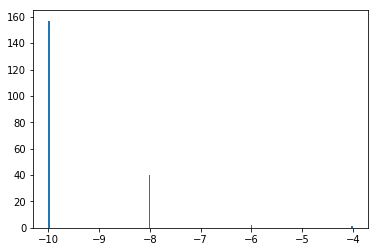

In [40]:
plt.hist(rewards, bins=200);

You should normally see some snakes who could get some fruits. It might be because your neural network works already (but I'm very doubtful about that), or just because they were some fruits in their path to rush to the cliff.<br>
Still, those are the candidates we will breed for the next generation.

In [41]:
percentage_saved = 0.1 #percentage of snakes which will be removed because they performance are too low
chances_of_mutation = 1e-2 #Chance that a neuron mutates when a breeding occurs.

In [42]:
farm.sort(key=lambda snake: snake._reward, reverse=True) #We order our list based on reward.

In [43]:
print("Worst score was "+str(farm[-1]._reward)+"; best score was"+str(farm[0]._reward))

Worst score was -10; best score was-4


We now define the mutation which will be able to create new snake based on the best

In [44]:
class NeuralNetwork():
    def __init__(self, observation_size, isACopy=False): #We add the isACopy to track the copy of layers.
        self._rewards = 0
        self._layers = []
        self._biases = []
        
        if(not isACopy):
            for i in range(nb_layers):
                entry_size = neurons if i != 0 else observation_size
                self._layers.append(np.random.rand(neurons,entry_size)*2-1)
                self._biases.append(np.random.rand(neurons,1)*2-1)


            self._outputs = np.random.rand(4,neurons)*2-1


    def forward(self, inputs):
        inputs = inputs.reshape((-1,1))
        

        for layer, bias in zip(self._layers, self._biases):
            inputs = np.matmul(layer,inputs)
            inputs = inputs+bias
            inputs = sigmoid_activate(inputs)
            
        inputs = np.matmul(self._outputs, inputs)
        inputs = inputs.reshape(-1)
        
        
        return softmax_activate(inputs)

    def mutate(self):
        new_snake = NeuralNetwork(self._layers[0].shape[1],isACopy=True) #Create a new object.
        
        for l in self._layers: #We copy the layers.. but we consider a possible mutation.
            random_mutation_probs = np.random.rand(l.shape[0], l.shape[1])
            #We create a mask that we will add to the layer.
            random_mutation_probs = np.where(random_mutation_probs < chances_of_mutation,
                                             (np.random.rand()-0.5)/2, 0)
            new_l = l + random_mutation_probs #we add he possible mutations
            new_snake._layers.append(new_l) #we affect the layer to the new snake.
            
            
        for b in self._biases: #Same for biases
            random_mutation_probs = np.random.rand(b.shape[0], 1)
            random_mutation_probs = np.where(random_mutation_probs < chances_of_mutation,
                                             (np.random.rand()-0.5)/2, 0)
            new_l = b + random_mutation_probs
            new_snake._biases.append(new_l)
    
    
        random_mutation_probs = np.random.rand(self._outputs.shape[0],self._outputs.shape[1])
        random_mutation_probs = np.where(random_mutation_probs < chances_of_mutation,
                                         (np.random.rand()-0.5)/2, 0)
        
        new_l = self._outputs + random_mutation_probs
        new_snake._outputs = new_l #Same for the output.
        return new_snake

    def set_reward(self, r):
        self._reward = r

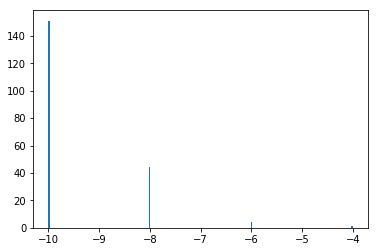

Best reward this time :-4


-4

In [45]:
def restart_simulation(): #Useful when we change the code of the Neural Network... as actual snake won't be updated.
    global farm
    
    for s in farm:
        del(s) #Memory cleaning.
        
    farm = []
    for _ in range(number_of_snakes):
        S = NeuralNetwork(obs_size)
        farm.append(S)

def run_global_simulation(display_tqdm = True, display_graph = True, track_best = True): #We create a function which gives a run.
    global farm
    
    rewards = []
    
    if(display_tqdm):
        for S in tqdm(farm):
            rewards.append(run_simulation(S))
    else:
        for S in farm:
            rewards.append(run_simulation(S))
    
    if(display_graph):
        plt.hist(rewards, bins=200);
        plt.show();
    
    farm.sort(key=lambda snake: snake._reward, reverse=True) #We order our list based on reward.
    
    if(track_best):
        print("Best reward this time :"+str(farm[0]._reward))
        
    return farm[0]._reward #Used for ploting.
        
restart_simulation()
run_global_simulation()


In [46]:
def darwin_cleaner():#Will clean the farm from the bad species.
    global farm #We will edit the variable from the function.
    
    qte_to_keep = int(percentage_saved * len(farm))
    new_farm = farm[:qte_to_keep] #The snakes we'll keep.
    
    new_species = []
    for i in range(len(farm) - qte_to_keep):
        father_snake = new_farm[i%qte_to_keep]
        new_snake = father_snake.mutate()
        new_species.append(new_snake)
        
    farm = new_farm + new_species

In [47]:
darwin_cleaner()

Let's try to some breeding... how about 15 generations to start ? (It's normal if it does not work!)

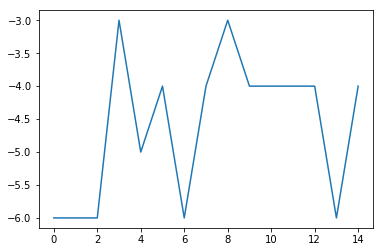

In [48]:
rewards = []
for _ in tqdm(range(15)):
    rewards.append(run_global_simulation(False, False, False))
    darwin_cleaner()
plt.plot(rewards);

Unless you are lucky, your results will be disappointing, like if your algorithm is not learning anything.<br>
Given the context, they are multiple elements which make it hard to learn :
- Lack of clear information in the dimensions
- Absence of normalization
- Too many dimensions
- Bad reward shaping
- Not enough epochs

## Dimensionality reduction

If you begin in the field, let met warn you : Dimensionality reduction is a term you will often hear in Machine Learning. It is not a very complex idea to understand, and it represents a large domain of research.<br><br>
<br>
This is pretty simple : Is it easier for you to dedicate your attention on 3 different screens or thousands ?<br>
Answer is simple : the less you have to focus on, the better you are.<br>
In Machine Learning, it is the same. All non essential data are considered as *noise*. So you try to reduce the noise as much as you can, so your network is able to be more efficient.<br>
Here, the main noise you have comes from the signification of observation neurons:

- Sometimes, the input neuron indicates the tail of the snake
- Sometimes, the input neuron indicates the fruit.
- Sometimes, the input neuron indicates the head of the snake.
- Somtimes, the input neurons indicates there is nothing on the cell.

Each case is a dimensions, so we have here 4 dimensions.<br>
Allowing the snake to understand where it is might thus be very hard.<br>
Imagine the following scenario :

<center><img src="ipynb_images/snake_next_to.jpg"></img></center><br><br>

Here, the Snake may have learnt that going up will give him the opportunity to earn a reward. However, this behavior is mapped to a specific neuron. Does the next image looks familiar ?

<center><img src="ipynb_images/snake_next_to_bot.jpg"></img></center><br><br>

It is for us, because we think "it only has to go on the top, like the previous one.". However, this is a totally different neuron which gives the same information : "a food is just up to you". We see here how we could reduce the dimensions : Keeping it at the same place (let's say the center of the view).
This way, the head is always in the center of the screen. The consequences are even greater :<br><br>

<center><img src="ipynb_images/snake_next_to_diag.jpg"></img></center><br><br>

If the fruit is 1 cell in diagonal next to him... it will always be the same pattern to do, no matter where it is on the map.<br>
Let's map him in the center of the map.

In [49]:
observation[observation != 0]

array([101., 100., 100., 255.])

In the above example, we see different parameters :
- 101 : The head
- 100 : The tail
- 255 : the fruit.

It is possible for us to localize the head thanks to the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html">np.argwhere()</a> function.

In [50]:
np.argwhere(observation == 101)

array([[9, 0]], dtype=int64)

we can next use the np.roll() to set our head in the center.

In [51]:
sample_env = np.zeros((11,11))
sample_env[7][3]=1
sample_env

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
localization = np.argwhere(sample_env == 1).reshape(-1)
sample_env = np.roll(sample_env,int(sample_env.shape[0]/2)-localization[0], axis = 0)
sample_env = np.roll(sample_env,int(sample_env.shape[1]/2)-localization[1], axis = 1)
sample_env

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [53]:
def update_observations(observation):

    localization = np.argwhere(observation == 101).reshape(-1) #We localize the head
    
    observation = np.roll(observation,int(observation.shape[0]/2)-localization[0], axis = 0)#Then shift the game.
    return np.roll(observation,int(observation.shape[1]/2)-localization[1], axis = 1)

observations = update_observations(observation)
observations[6:11,6:11]

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0., 101., 100., 100.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

Head in center, we can see the tail with the 100... However, we added a problem when we solved the other : What about the cliff ?<br>
We don't have anymore boundaries informing about the limit of the map!<br>
Let's consider the following case :<br><br>

<center><img src="ipynb_images/snake_opposit.jpg"></img></center><br><br>

With our current algorithm, this is shown as the following :

In [54]:
example_observation = np.zeros(observations.shape)
example_observation[4, example_observation.shape[1]-1] = 101
example_observation[4, example_observation.shape[1]-2] = 100
example_observation[4, example_observation.shape[1]-3] = 100
example_observation[4, 0] = 255
example_observation = update_observations(example_observation)#We apply or centering.
example_observation[6:11,6:11] #We zoom

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [100., 100., 101., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

The logical deduction for our algorithm would be "If I go right, I get a reward"... when it facts, not really. Instead, it looses the game. We need to "inform" the snake that it must go on the right.
To do it... we will create boundaries around the map. A wall.<br><br>
<center><img src="ipynb_images/snake_wall.jpg"></img></center><br><br>
Why did I choose this horrible green color you may ask ?... Well, it's because we can represent the risk of a wall like the tail. Touching the tail or the cliff with the head leads to the same effect : loosing the game.<br>
By coding 101 both cliff and tail, we avoid to create a new dimension which would differentiate the tail from the cliff.

In [55]:
def update_observations(observation):
    
    cliffs = np.ones((observation.shape[0]+2,observation.shape[1]+2))#We clone the shape of the observation
    cliffs *= 100 #We set up all values to 100 (tails = cliff)
    cliffs[1:cliffs.shape[0]-1,1:cliffs.shape[1]-1] = observation #We paste our observatoin
    
    observation = cliffs #We transfer variables to reuse the same code.
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    observation = np.roll(observation,int(observation.shape[0]/2)-localization[0], axis = 0)
    observation = np.roll(observation,int(observation.shape[1]/2)-localization[1], axis = 1)
    
    return observation

observations = env.reset();
example_observation = np.zeros(observations.shape)
example_observation[4, example_observation.shape[1]-1] = 101
example_observation[4, example_observation.shape[1]-2] = 100
example_observation[4, example_observation.shape[1]-3] = 100
example_observation[4, 0] = 255
example_observation = update_observations(example_observation)#We apply or centering.
example_observation[6:13, 6:13]

array([[  0.,   0.,   0.,   0., 100., 100.,   0.],
       [  0.,   0.,   0.,   0., 100., 100.,   0.],
       [  0.,   0.,   0.,   0., 100., 100.,   0.],
       [  0., 100., 100., 101., 100., 100., 255.],
       [  0.,   0.,   0.,   0., 100., 100.,   0.],
       [  0.,   0.,   0.,   0., 100., 100.,   0.],
       [  0.,   0.,   0.,   0., 100., 100.,   0.]])

The result is good : We see clearly a wall between the food and our snake... But, we added more difficulty : The surrounding square increased the number of 68. Something should be done with this...<br>
So what about the nice view you see upper ? We don't need to display the full map... We can simply use a part of it to focus the network's attention.<br>

In [56]:
def update_observations(observation, view_size = 2):
    assert view_size > 0, "The agent cannot see the map if you don't set a view_size over 0!"
    
    cliffs = np.ones((observation.shape[0]+2,observation.shape[1]+2))
    cliffs *= 100
    cliffs[1:cliffs.shape[0]-1,1:cliffs.shape[1]-1] = observation
    
    observation = cliffs
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    observation = np.roll(observation,int(observation.shape[0]/2)-localization[0], axis = 0)
    observation = np.roll(observation,int(observation.shape[1]/2)-localization[1], axis = 1)
    
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    
    observation = observation[localization[0]-view_size:localization[0]+view_size+1,
                       localization[1]-view_size:localization[1]+view_size+1] #We zoom
    
    return observation

observation = update_observations(env.reset())
observation

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [100., 100., 101.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

Our observation is flatten by the network, therefore we can do it in our *update_observations* function.<br>
Also, when we think about the center neuron, it will always remain the same : always the head of the snake. So let's remove it at the same time, we will decrease the number of dimension by 1 unnecessary.<br>

In [57]:
def update_observations(observation, view_size = 2):
    assert view_size > 0, "The agent cannot see the map if you don't set a view_size over 0!"
    
    cliffs = np.ones((observation.shape[0]+2,observation.shape[1]+2))
    cliffs *= 100
    cliffs[1:cliffs.shape[0]-1,1:cliffs.shape[1]-1] = observation
    
    observation = cliffs
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    observation = np.roll(observation,int(observation.shape[0]/2)-localization[0], axis = 0)
    observation = np.roll(observation,int(observation.shape[1]/2)-localization[1], axis = 1)
    
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    observation = observation[localization[0]-view_size:localization[0]+view_size+1,
                       localization[1]-view_size:localization[1]+view_size+1]
    
    observation = np.reshape(observation, (-1)) #we flatten the view
    localization = np.argwhere(observation == 101).reshape(-1)[0] #We get the offset of the head.
    observation = np.delete(observation, localization)#We remove the head.
    
    return observation

observation = update_observations(env.reset())
observation

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.,
       100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.])

So, let's make a recap. In this part we have :
- Reduced the total number of view to 1
- Remove the head dimension from the map
- Inform specifically where the boundaries of the map are. If the network learns to recognize them, it will also learn to recognize its tail.
- Reduced vision to 24 neurons

Considering the last step divides by 10 the complexity of the vision, I am sure you see how much simpler this vision has become.<br>
However now... how can the snake know where to find the apple ? It could roam randomly, but we will help him.<br>
We could add a neuron to to state if it the fruit is up or down from him, and another if is on the right or left.<br>
Let's just give a negative value if the index is before his, a positive if it is after.

In [58]:
def update_observations(observation, view_size = 2):
    assert view_size > 0, "The agent cannot see the map if you don't set a view_size over 0!"
    
    cliffs = np.ones((observation.shape[0]+2,observation.shape[1]+2))
    cliffs *= 100
    cliffs[1:cliffs.shape[0]-1,1:cliffs.shape[1]-1] = observation
    
    observation = cliffs
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    fruit_localization = np.argwhere(observation == 255).reshape(-1) #We localize the fruit.
    high = (localization[0] - fruit_localization[0]) #We create a neuron (up or down)
    width = (localization[1] - fruit_localization[1]) #Then a second (left or right)
    high = min(max(-1,high),1) #We don't need to know the distance, let's make it simple : 1, 0 or -1
    width = min(max(-1,width),1)
    
    observation = np.roll(observation,int(observation.shape[0]/2)-localization[0], axis = 0)
    observation = np.roll(observation,int(observation.shape[1]/2)-localization[1], axis = 1)
    
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    observation = observation[localization[0]-view_size:localization[0]+view_size+1,
                       localization[1]-view_size:localization[1]+view_size+1]
    
    observation = np.reshape(observation, (-1)) #we flatten the view
    localization = np.argwhere(observation == 101).reshape(-1)[0] #We get the offset of the head.
    observation = np.delete(observation, localization)#We remove the head.
    
    observation = np.concatenate((observation, [high, width]))
    return observation

observation = update_observations(env.reset())
observation

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 100., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  -1.])

In [59]:
observation.shape

(26,)

Done! This was long but we did it! Now, we drastically decreased the problem we face!


## Normalization

An important concept of neural networks (and Machine Learning in General) is called the normalization.<br>
The idea behind is to have the same tool to measure everything.
- If you want to measure the size of an ant with a ruler, it should not requires too much work.
- If you want to measure the desk with the same ruler... I suppose it will a bit more difficult, but you should succeed.
- If you want to measure the rool with the same ruler... it will get even harder.
- If you have to measure the distance between your home and the Eiffel Tower, it will be almost impossible.
- So if I'm talking about the distance between the Sun and Earth... well, I guess you get the idea.

A ML algorithm experience the same problem. If it starts to compare something with a tool, and something else of a total different magnitude, it will be hard for it to perform adequate measure.<br>
<br>
To counter the problem, data scientists use something called *Normalization*. It is a process to put everything on the same scale : from 0 to 1.<br>
Regarding what we did with activation function, we already had a first taste of normalization. We wanted to contrain our impulse between 0 and 1. The same applies for the inputs.<br><br>
If you look at the observation type of data, your algorithm may not easily find how to proceed.

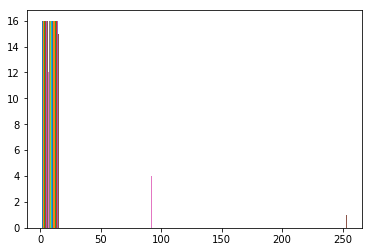

In [60]:
observations = env.reset()

plt.hist(observations, bins=15);
plt.show();

In [61]:
observations[observations != 0]

array([101., 100., 100., 100., 255.])

We have a huge problem : The more a neuron lights, the more it gives an information... What if, thus, a neuron would detect the food ?... it would light at half the power to inform that this is the tail of the snake.<br>
The information could be missleading. Instead, we should try to give more sense to the signals. Make a real difference between the <strike>head (101),</strike> the tail (100) and the food (255).

In [62]:
def update_observations(observation, view_size = 2):
    assert view_size > 0, "The agent cannot see the map if you don't set a view_size over 0!"
    
    cliffs = np.ones((observation.shape[0]+2,observation.shape[1]+2))
    cliffs *= 100
    cliffs[1:cliffs.shape[0]-1,1:cliffs.shape[1]-1] = observation
    
    observation = cliffs
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    fruit_localization = np.argwhere(observation == 255).reshape(-1)
    high = (localization[0] - fruit_localization[0])
    width = (localization[1] - fruit_localization[1])
    high = min(max(-1,high),1)
    width = min(max(-1,width),1)
    
    observation = np.roll(observation,int(observation.shape[0]/2)-localization[0], axis = 0)
    observation = np.roll(observation,int(observation.shape[1]/2)-localization[1], axis = 1)
    
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    observation = observation[localization[0]-view_size:localization[0]+view_size+1,
                       localization[1]-view_size:localization[1]+view_size+1]
    
    observation = np.reshape(observation, (-1)) 
    localization = np.argwhere(observation == 101).reshape(-1)[0]
    observation = np.delete(observation, localization)
    
    
    observation = np.where(observation == 100, -101, observation) #We replace the wall & tail by a negative value.
    
    observation = np.concatenate((observation, [high, width]))
    return observation

If you think about our way to update weights, we do it at a very slow magnitude.<br>
Because we update our weights by less than 0.5 in the hidden layers, it would take a longer time for the model to change the meaning of an input neurons. Let's consider the good as an example:<br>
- Weight is between -1 and 1.
- Input is at 255.
- Biases are between 1 and -1.

Let's imagine that, in the current architecture, a neuron of the snake is responsible of fleeing the food. If it is 1, the snake will try to get close. If -1, it will flee it. Let's think about the following weights:
- Weights of the input is -1
- Bias is at 1.
- Input is 255.

The total sum is -254. This means the bias does not mean much (nothing, let's make it clear!) compared to the other strength.<br>
If we consider the optimal change where each step update the weights of the input neuron at its maximum (0.25)... We would need 4 generations to change this behavior... but we are working with randomness.<br>
This means for every probability we have to go in this direction, we have the same probability to go in the other. Let's imagine the best magnitude, everytime, and let's calculate the probability we have to fix this problem:

In [63]:
(1/2)**4

0.0625

Also, even if the Not that much!... Let's make it easier : let's put all value between 1 and 0, so that all of them has a same strength.

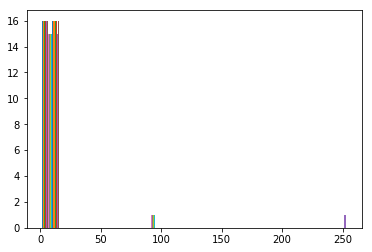

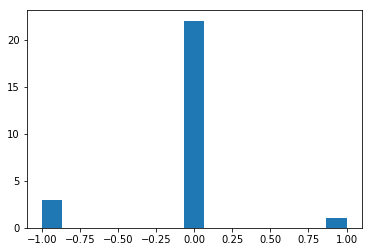

In [64]:
def update_observations(observation, view_size = 2):
    assert view_size > 0, "The agent cannot see the map if you don't set a view_size over 0!"
    
    cliffs = np.ones((observation.shape[0]+2,observation.shape[1]+2))
    cliffs *= 100
    cliffs[1:cliffs.shape[0]-1,1:cliffs.shape[1]-1] = observation
    
    observation = cliffs
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    fruit_localization = np.argwhere(observation == 255).reshape(-1)
    high = (localization[0] - fruit_localization[0])
    width = (localization[1] - fruit_localization[1])
    high = min(max(-1,high),1)
    width = min(max(-1,width),1)
    
    observation = np.roll(observation,int(observation.shape[0]/2)-localization[0], axis = 0)
    observation = np.roll(observation,int(observation.shape[1]/2)-localization[1], axis = 1)
    
    
    localization = np.argwhere(observation == 101).reshape(-1)
    
    observation = observation[localization[0]-view_size:localization[0]+view_size+1,
                       localization[1]-view_size:localization[1]+view_size+1]
    
    observation = np.reshape(observation, (-1)) 
    localization = np.argwhere(observation == 101).reshape(-1)[0]
    observation = np.delete(observation, localization)
    
    
    observation = np.where(observation == 255, 1, observation) #We replace the fruit by 1.
    observation = np.where(observation == 100, -1, observation) #We replace the wall & tail by 1.
    
    observation = np.concatenate((observation, [high, width]))
    return observation

observations = env.reset()

plt.hist(observations, bins=15);
plt.show();
plt.hist(update_observations(observations), bins=15);
plt.show();

Isn't the difference significative ?... Let's run to see the difference!

In [65]:
neurons = 10 #We reduce the size of the network.
obs_size = update_observations(env.reset()).shape[0] #We reduce the size of the input...
                                                        #which is used for the definition of the snakes!

In [66]:
class NeuralNetwork():
    def __init__(self, observation_size, isACopy=False):
        self._rewards = 0
        self._layers = []
        self._biases = []
        
        if(not isACopy):
            for i in range(nb_layers):
                entry_size = neurons if i != 0 else observation_size
                self._layers.append(np.random.rand(neurons,entry_size)*2-1)
                self._biases.append(np.random.rand(neurons,1)*2-1)


            self._outputs = np.random.rand(4,neurons)*2-1


    def forward(self, inputs):
        inputs = update_observations(inputs) #We update the observation size.
        inputs = inputs.reshape((-1,1))
        

        for layer, bias in zip(self._layers, self._biases):
            inputs = np.matmul(layer,inputs)
            inputs = inputs+bias
            inputs = sigmoid_activate(inputs)
            
        inputs = np.matmul(self._outputs, inputs)
        inputs = inputs.reshape(-1)
        
        
        return softmax_activate(inputs)

    def mutate(self):
        new_snake = NeuralNetwork(self._layers[0].shape[1],isACopy=True)
        
        for l in self._layers:
            random_mutation_probs = np.random.rand(l.shape[0], l.shape[1])
            
            random_mutation_probs = np.where(random_mutation_probs < chances_of_mutation,
                                             (np.random.rand()-0.5)/2, 0)
            new_l = l + random_mutation_probs
            new_snake._layers.append(new_l)
            
            
        for b in self._biases:
            random_mutation_probs = np.random.rand(b.shape[0], 1)
            random_mutation_probs = np.where(random_mutation_probs < chances_of_mutation,
                                             (np.random.rand()-0.5)/2, 0)
            new_l = b + random_mutation_probs
            new_snake._biases.append(new_l)
    
    
        random_mutation_probs = np.random.rand(self._outputs.shape[0],self._outputs.shape[1])
        random_mutation_probs = np.where(random_mutation_probs < chances_of_mutation,
                                         (np.random.rand()-0.5)/2, 0)
        
        new_l = self._outputs + random_mutation_probs
        new_snake._outputs = new_l
        return new_snake

    def set_reward(self, r):
        self._reward = r

In [67]:
restart_simulation() #cleaning previous models.

rewards = []
for _ in tqdm(range(10)):
    rewards.append(run_global_simulation(False, False, False))
    darwin_cleaner()

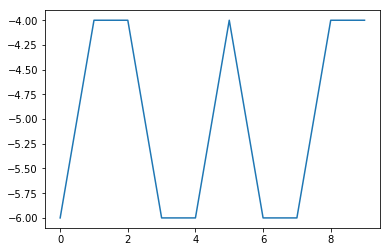

In [68]:
plt.plot(rewards);

We did not gather much improvement on this training... let's use more snakes and calculate more generations!<br>
Right now, we are performing our training as a sequence : 1 environment at a time.<br>
The more we train, the stronger will become our model, so let's speed up the process.

# Increasing speed

In the above run, each epoch was ran in sequence... this is not very effective. What we could (and will!) do, would be to run in parallel each snake.

In [69]:
from joblib import Parallel, delayed
import multiprocessing #Required for computation.

num_cores = multiprocessing.cpu_count()

In [70]:
def run_simulation_parallel(snake, nb_of_simulations=10):
    import sneks
    
    total_reward = 0 #Used to track the performance of the Snake.
    local_env = gym.make("babysnek-raw-16-v1")
    for _ in range(nb_of_simulations):
        
        observation = local_env.reset()
        done = False
        
        while(not done):
            observation, reward, done, info = local_env.step(snake.forward(observation).argmax()) #We exectue an action.
            #env.render() #We DO NOT CALL RENDER HERE, we now need speed!
            total_reward += reward
    
    snake.set_reward(total_reward)
    
    return snake

def run_global_simulation_parallel(display_tqdm = True, track_best = True, nb_of_simulations = 10): #We create a function which gives a run.
    global farm
    
    rewards = []
    
    if(display_tqdm):
        farm = Parallel(n_jobs=num_cores)(delayed(run_simulation_parallel)(S, nb_of_simulations) for S in tqdm(farm))
    else:
        farm = Parallel(n_jobs=num_cores)(delayed(run_simulation_parallel)(S, nb_of_simulations) for S in farm)
    
    
    farm.sort(key=lambda snake: snake._reward, reverse=True) #We order our list based on reward.
    
    if(track_best):
        print("Best reward this time "+str(farm[0]._reward)+" ; worst was "+str(farm[-1]._reward))

In [71]:
number_of_snakes = 2000

In [72]:
restart_simulation() #cleaning previous models and generating new ones.

In [73]:
%%time
run_global_simulation_parallel(True, False)


Wall time: 9.53 s


In [74]:
restart_simulation() #cleaning previous models and generating new ones.

In [75]:
%%time
run_global_simulation(True, False, False)


Wall time: 41.9 s


-4

On my computer, I got 81% increase speed thanks to parallelization and code adjusting. We can now run the final training!

In [76]:
import pickle #used to store the different generations

#We create function to compare our snakes.
def save_snake(id_iteration):
    with open("snake_{}.obj".format(id_iteration),'wb') as file_save:
        #We create a dict of the snake parameters
        to_save = {"layers":farm[0]._layers,
                     "biases":farm[0]._biases,
                     "outputs":farm[0]._outputs}
        #And save it using picke
        pickle.dump(to_save,file_save, protocol=pickle.HIGHEST_PROTOCOL)

def load_snake(id_iteration):
    with open("snake_{}.obj".format(id_iteration),'rb') as file_save:
        
        snake_params = pickle.load(file_save)

        snake = NeuralNetwork(obs_size)
        snake._layers = snake_params["layers"]
        snake._biases = snake_params["biases"]
        snake._outputs = snake_params["outputs"]
        
        return snake

In [77]:
%matplotlib notebook
generation_results = [] #Will be used to track the best element at each step.

number_of_snakes = 2000
restart_simulation()


def interactive_plot():
    ax.set_ylim(min(generation_results)-1,max(generation_results)+1)
    ax.set_xlim(-1,len(generation_results)+1)
    x = np.arange(len(generation_results))
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            line.set_ydata(generation_results)
    else:
        ax.plot(x, generation_results)
    fig.canvas.draw()

<IPython.core.display.Javascript object>


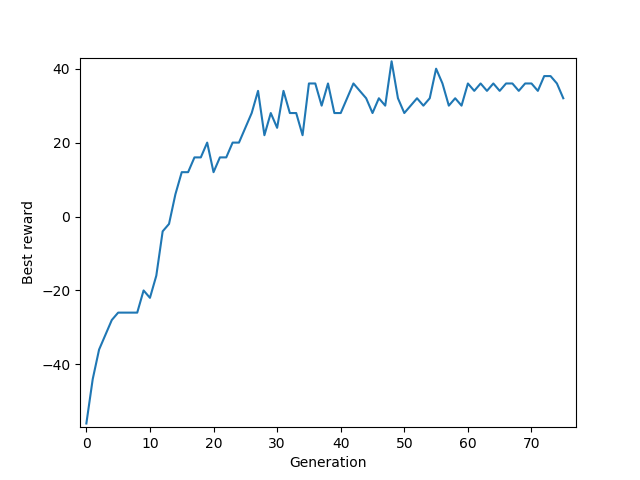

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Generation')
ax.set_ylabel('Best reward')

for iteration in tqdm(range(100),unit="generation"):
    run_global_simulation_parallel(False, False, nb_of_simulations=100)
        #We increase the number of simulation to get more data for each snake.
    generation_results.append(farm[0]._reward)
    interactive_plot()
    if(iteration % 10 == 0):
        save_snake(iteration)
    darwin_cleaner()

Our training seems stationnary, so I decided to stop the training after 240 epochs. We could wait for our neural network to maybe find some solution by pure randomness... Looking at its behavior, we may hope to find out how did the agent evoluted during the process.

In [ ]:
for _ in tqdm(range(10)):
    observation = env.reset()
    done = False

    while(not done):
        env.render()
        done = False
        while(not done):
            observation, res, done, info = env.step(farm[0].forward(observation).argmax())
            env.render()
            time.sleep(0.1)

We see our agent does not simply run in the cliff anymore. It is now able to find (sometimes) the fruit and develop a real strategy to get it however, it looks like __exactly__ the same strategy everytime. A strategy which does not work at all for some configuration (mine was not able to adopt an efficient behavior if the fruit was above his head).<br>
What we could do is letting it running and expect it to find a solution to reach these other cases. And it might succeed.<br>
However, since our environment consider that reaching the fruit stops the episode, we may not be able to select a new behavior which finds the new fruits but forgets about the other one (by having a large number of simulation at each generation, it remains possible...).<br>
To improve this part, we will try to improve our conditions.<br><br>

# Changing the reward function

It is necessary to find another way to judge of the efficiency agent. For this, we can :<br>
- Improving the reward function (by adding point when the agent get closer to the fruit)
- Allowing to get more than 1 fruit during episode, in order to give better rewards to more polyvalent agents.

We will start by the second approach, because it is easier to implement.<br>
Indeed, sneks provides another environment called "snek" instead of "babysnek". No need to restart from scratch. Our trained agents are totally able to work in this same environment.<br>

In [ ]:
farm = [load_snake(240) for _ in range(number_of_snakes)]

In [ ]:
def run_simulation_parallel(snake, nb_of_simulations=10):
    import sneks
    
    total_reward = 0
    local_env = gym.make("snek-raw-16-v1") #Updates the environment name
    for _ in range(nb_of_simulations):
        step = 0
        
        observation = local_env.reset()
        done = False
        
        while(not done):
            observation, reward, done, info = local_env.step(snake.forward(observation).argmax())
            step += 1
            total_reward += reward
    
    snake.set_reward(total_reward)
    
    return snake

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Generation')
ax.set_ylabel('Best reward')

generation_results = [] #Reset for second training

for iteration in tqdm(range(241, 1600),unit="generation"):#Since we stopped at 240, we restart at 241.
    
    run_global_simulation_parallel(False, False, nb_of_simulations=100)
    generation_results.append(farm[0]._reward)
    interactive_plot()
    if(iteration % 10 == 0):
        save_snake(iteration)
    darwin_cleaner()

Special note :<br>
I have drawn the neural networks using an online tool from ALEXANDER LENAIL. If you want to check this out, it's <a href="http://alexlenail.me/NN-SVG/LeNet.html">here</a>.